# Chapter 6 Structural Analysis

## Section 6.1 Simple Trusses
* Truss - Structural composed of slender members joined together at their end points, members usually made of wooden struts or metal bars
* Planar truss - lie in a single plane, used to support roofs and bridges
* Rollers or rockers are used for supporting one end of a bridge or roof truss over a longer distance so there is freedom of expansion or contraction of the members due to temperature change or load
* Designing members and connections of a truss - first determine the force in each member when the truss is loaded, make 2 assumptions,
    * All loadings are applied at the joints - this is true in most situations, like bridges and trusses, neglect weight of the members since the load is much larger, if weight is included apply it as a vertical force, with half of its magnitude applied at each end of the member
    * The members are joined together by smooth pins - joint connections formed by bolting or welding the ends of the members to a common plate, or gusset plate, or by passing a large bolt or pin through each of the members, we can assume these connections act as pins provided the center lines of the joining members are concurrent
* As a result of these assumptions each truss member acts a two-force member, and the force acting at each end of the member will be directed along the axis of the member
* Tensile Force - a force that elongates the member
* Compressive Force - a force that tends to shorten the member
* Compression members made thicker than tension members because of buckling or column effect that occurs when a member is in compression
* Triangular Truss - 3 members are pin connected at the ends, truss will be rigid
* Adding 2 more members to a triangular truss and form a new joint $D$ forms a larger truss
* A truss that can be constructed by expanding the basic triangular truss this way, are called simple truss

## Section 6.2 The Method of Joints
* Method of Joints - if the entire truss is in equilibrium then each of its joints are also in equilibrium
* Can draw FBD of each joint and use force equilibrium equations to obtain the member forces acting on each joint
* Members of plane trust are straight two-force members in a single plane, each joint is subjected to a force system that is coplanar and concurrent, therefore only $\sum F_x = 0$ and $\sum F_y = 0$ need to be satisfied for equilibrium.
* Applying method of joints - start with a joint having at least one unknown, at most two unknown, this way application of equilibrium equations, $\sum F_x = 0$ and $\sum F_y = 0$, yields two equations, which can be solved for two unknowns.
* Determining sense of unknown member force, two ways
    * Can determine the sense of the force by inspection or assumption in complex cases, after computations if the answer is positive it is the correct sense, if it is negative the sense should be flipped
    * Assume the member forces acting on the joint to be tension, the forces pull the pin, if the equilibrium equations yield a positive scalar then the members are in tension and if it is negative then the members are in compression, then use its correct magnitude and sense on the FBD
* A force pushing on a joint is caused by compression
* A force pulling on a joint is caused by tension in a member
* The internal forces in the members are drawn in the FBD of the joints, i.e. the internal forces become external

## Section 6.3 Zero-Force Members
* We can simplify method of joints by finding which members support no loading, these zero-force members increase stability of the truss during construction and to provide added support if the load is changed
* These can be found through inspection of the joints, if only two non-collinear members form a truss joint and no external load or support reaction is applied to the joint then the two members are zero-force members
* In general if three members form a truss joint and two of the members are collinear the third member is a zero-force member provided no external force or support reaction has a component that acts along this member
* Zero-force members do not support the load

Problem 11
Determine the force in each member of the Pratt
truss, and state if the members are in tension or compression.

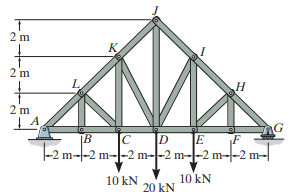

In [184]:
from IPython.display import Image
Image("pictures/problem_6_11.png")

(-1.0, 8.0)

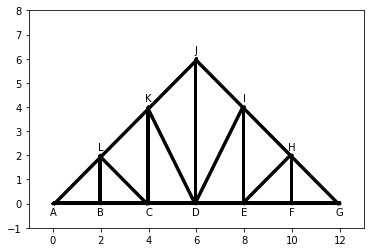

In [185]:
import string
import numpy as np
from matplotlib.patches import FancyArrow, Rectangle, Circle
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
theta = np.degrees(np.arctan(4/2))
def draw_beam(origin,length, thickness,angle):
    beam = Rectangle(origin, length, thickness, edgecolor='black', facecolor='black',angle=angle,fill=True)
    axes.add_patch(beam)
    return
points = {
    'A': np.array([0, 0]),
    'B': np.array([2, 0]),
    'C': np.array([4, 0]),
    'D': np.array([6, 0]),
    'E': np.array([8, 0]),
    'F': np.array([10, 0]),
    'G': np.array([12, 0]),
    'H': np.array([10, 2]),
    'I': np.array([8, 4]),
    'J': np.array([6, 6]),
    'K': np.array([4, 4]),
    'L': np.array([2, 2]),
}
orientations = ['bottom','bottom','bottom','bottom','bottom','bottom','bottom','top','top','top','top','top']
point_labels = list(string.ascii_uppercase)[:12]

for label,orientation in zip(point_labels,orientations):
    dot = Circle(points[label], radius=0.05, fill=True, color='black')
    axes.add_patch(dot)
    if orientation=='top':
        plt.text(points[label][0],points[label][1] + .15,label,va='bottom',ha='center')
    elif orientation=='bottom':
        plt.text(points[label][0],points[label][1] - 0.15,label,va='top',ha='center')
    else:
        plt.text(points[label][0],points[label][1],label,va='center',ha='center')
beams = {
    'AJ': {'origin': (6,6), 'length':np.sqrt(72),'angle': 45+180 },
    'GJ': {'origin': (12,0),'length':np.sqrt(72), 'angle': 135},
    'AG': {'origin': (0,0),'length':12, 'angle': 0},
    'JD': {'origin': (6,6),'length':-6, 'angle': 90},
    'KC': {'origin': (4,4),'length':-4, 'angle': 90},
    'LB': {'origin': (2,2),'length':-2, 'angle': 90},
    'IE': {'origin': (8,4),'length':-4, 'angle': 90},
    'HF': {'origin': (10,2),'length':-2, 'angle': 90},
    'LC': {'origin': (2,2),'length':-np.sqrt(8), 'angle': 135},
    'KD': {'origin': (4,4),'length':-np.sqrt(20), 'angle': -theta+180},
    'ID': {'origin': (8,4),'length':-np.sqrt(20), 'angle': theta},
    'HE': {'origin': (10,2),'length':-np.sqrt(8), 'angle': 45},
}
for label, beam in beams.items():
    draw_beam(beam['origin'],beam['length'],.1,beam['angle'])
axes.set_xlim([-1 , 13])
axes.set_ylim([-1 ,8])


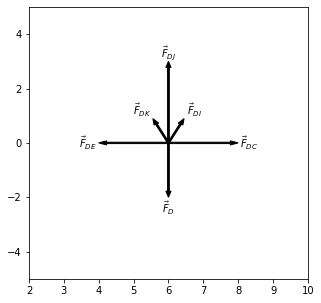

In [186]:
figure, axes = plt.subplots(figsize=(5,5))
axes.set_xlim([2 , 10])
axes.set_ylim([-5 ,5])
alpha = np.arctan(4/2)
vectors = {
    'F_{DC}': {'origin': points['D'], 'vector': np.array([2,0])},
    'F_{DJ}': {'origin': points['D'], 'vector': np.array([0,3])},
    'F_{DE}': {'origin': points['D'], 'vector': np.array([-2,0])},
    'F_{DK}': {'origin': points['D'], 'vector': np.array([-np.cos(alpha),np.sin(alpha)])},
    'F_{DI}': {'origin': points['D'], 'vector': np.array([np.cos(alpha),np.sin(alpha)])},
    'F_{D}': {'origin':  points['D'], 'vector': np.array([0,-2])},
}
orientations = ['right','top','left','left_up','right_up','bottom']
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.05,length_includes_head=True, color='k')
    axes.add_patch(vector_arrow)

labels = ['F_{DC}','F_{DJ}','F_{DE}','F_{DK}','F_{DI}','F_{D}']
for orientation,label in zip(orientations,labels):
    if orientation=='top':
        plt.text(vectors[label]['origin'][0] + vectors[label]['vector'][0],vectors[label]['origin'][1]+ vectors[label]['vector'][1] * 1.1,r'$\vec{'+label[0]+r'}' + label[1:] + r'$',va='center',ha='center')
    elif orientation=='bottom':
        plt.text(vectors[label]['origin'][0] + vectors[label]['vector'][0],vectors[label]['origin'][1]+ vectors[label]['vector'][1] * 1.2,r'$\vec{'+label[0]+r'}' + label[1:] + r'$',va='center',ha='center')
    elif orientation=='left':
        plt.text(vectors[label]['origin'][0] + vectors[label]['vector'][0] - .3,vectors[label]['origin'][1]+ vectors[label]['vector'][1],r'$\vec{'+label[0]+r'}' + label[1:] + r'$',va='center',ha='center')
    elif orientation=='right':
        plt.text(vectors[label]['origin'][0] + vectors[label]['vector'][0] + .3,vectors[label]['origin'][1]+ vectors[label]['vector'][1],r'$\vec{'+label[0]+r'}' + label[1:] + r'$',va='center',ha='center')
    elif orientation=='left_up':
        plt.text(vectors[label]['origin'][0] + vectors[label]['vector'][0] - .3,vectors[label]['origin'][1]+ vectors[label]['vector'][1] + .3,r'$\vec{'+label[0]+r'}' + label[1:] + r'$',va='center',ha='center')
    elif orientation=='right_up':
        plt.text(vectors[label]['origin'][0] + vectors[label]['vector'][0] + .3,vectors[label]['origin'][1]+ vectors[label]['vector'][1] + .3,r'$\vec{'+label[0]+r'}' + label[1:] + r'$',va='center',ha='center')
    else:
        plt.text(vectors[label]['origin'][0] + vectors[label]['vector'][0],vectors[label]['origin'][1]+ vectors[label]['vector'][1],r'$\vec{'+label[0]+r'}' + label[1:] + r'$',va='center',ha='center')


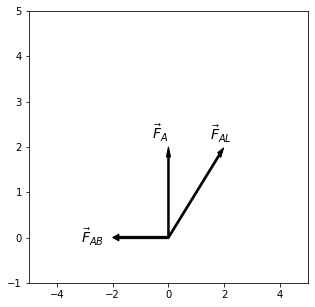

In [187]:
figure, axes = plt.subplots(figsize=(5,5))
axes.set_xlim([-5 , 5])
axes.set_ylim([-1 ,5])
beta = np.radians(45)
vectors = {
    'F_{A}': {'origin': points['A'], 'vector': np.array([0,2])},
    'F_{AL}': {'origin': points['A'], 'vector': np.array([2.8 * np.cos(beta),2.8 * np.sin(beta)])},
    'F_{AB}': {'origin': points['A'], 'vector': np.array([-2,0])}
}
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.05,length_includes_head=True, color='k')
    axes.text(origin[0] + vector[0] * 1.15,
               origin[1] + vector[1] * 1.15,
               r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
               va='center',ha='right'
                               )
    axes.add_patch(vector_arrow)

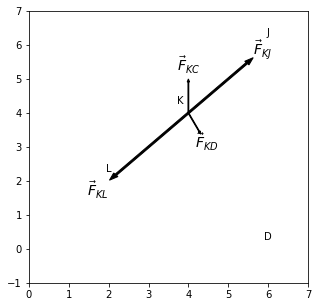

In [188]:
figure, axes = plt.subplots(figsize=(5,5))
axes.set_xlim([0 , 7])
axes.set_ylim([-1 ,7])
beta = np.radians(45)
gamma = np.arctan(-4/2)
point_labels = ['L','K','J','D']
orientations = ['top','left','top','top']
for label,orientation in zip(point_labels,orientations):
    dot = Circle(points[label], radius=0.05, fill=True, color='white')
    axes.add_patch(dot)
    if orientation=='top':
        plt.text(points[label][0],points[label][1] + .2,label,va='bottom',ha='center')
    if orientation=='left':
        plt.text(points[label][0] - .2,points[label][1] + .2,label,va='bottom',ha='center')
vectors = {
    'F_{KL}': {'origin': points['K'], 'vector': np.array([-2.8 * np.cos(beta),-2.8 * np.sin(beta)])},
    'F_{KJ}': {'origin': points['K'], 'vector': 2.3 * np.array([np.cos(beta),np.sin(beta)])}
}
vectors_1 = {
    'F_{KC}': {'origin': points['K'], 'vector': np.array([0,1])},
    'F_{KD}': {'origin': points['K'], 'vector': np.array([.7 * np.cos(gamma),.7 * np.sin(gamma)])},
}
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.05,length_includes_head=True, color='k')
    axes.text(origin[0] + vector[0] * 1.15,
               origin[1] + vector[1] * 1.15,
               r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
               va='center',ha='center'
                               )
    axes.add_patch(vector_arrow)
for label, vector_dictionary in vectors_1.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.02,length_includes_head=True, color='k')
    axes.text(origin[0] + vector[0] * 1.5,
               origin[1] + vector[1] * 1.4,
               r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
               va='center',ha='center'
                               )
    axes.add_patch(vector_arrow)


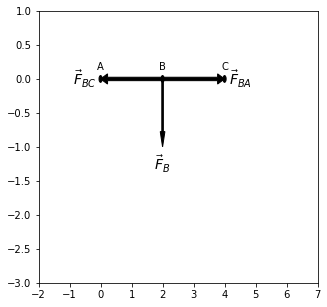

In [189]:
figure, axes = plt.subplots(figsize=(5,5))
axes.set_xlim([-2 , 7])
axes.set_ylim([-3 ,1])

point_labels = list(string.ascii_uppercase)[:3]
orientations = ['top','top','top']
for label,orientation in zip(point_labels,orientations):
    dot = Circle(points[label], radius=0.05, fill=True, color='black')
    axes.add_patch(dot)
    if orientation=='top':
        plt.text(points[label][0],points[label][1] + .1,label,va='bottom',ha='center')
vectors = {
    'F_{B}': {'origin': points['B'], 'vector': np.array([0,-1])},
    'F_{BA}': {'origin': points['B'], 'vector': np.array([2,0])},
    'F_{BC}': {'origin': points['B'], 'vector': np.array([-2,0])}
}
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.05,length_includes_head=True, color='k')
    axes.text(origin[0] + vector[0] * 1.25,
               origin[1] + vector[1] * 1.25,
               r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
               va='center',ha='center'
                               )
    axes.add_patch(vector_arrow)

In [190]:
import numpy as np
angles = np.array([np.pi/4,np.arctan(4/2)])
beam_length = 2
positions = {
    'A': np.array([0,0]),
    'B': np.array([beam_length,0]),
    'C': np.array([2 * beam_length, 0]),
    'D': np.array([3 * beam_length, 0]),
    'E': np.array([4 * beam_length, 0]),
    'F': np.array([5 * beam_length, 0]),
    'G': np.array([6 * beam_length, 0]),
    'H': np.array([5 * beam_length,beam_length]),
    'I': np.array([4 * beam_length,2 * beam_length]),
    'J': np.array([3 * beam_length,3 * beam_length]),
    'K': np.array([2 * beam_length,2 * beam_length]),
    'L': np.array([beam_length,beam_length]),
}
vectors_by_joint = {
    'C': {'C': np.array([0,-10e3])},
    'D': {'D': np.array([0,-20e3])},
    'E': {'E': np.array([0,-10e3])},
}
for joint in ['A','B','F','G','H','I','J','K','L']:
    vectors_by_joint[joint] = {}
F_R = np.zeros(2)
for vectors in vectors_by_joint.values():
    for vector in vectors.values():
        F_R = F_R + vector

vectors_by_joint['A']['A'] = -0.5 * F_R
vectors_by_joint['G']['G'] = -0.5 * F_R
A_magnitude = np.linalg.norm(vectors_by_joint['A']['A'])
#zero force members
vectors_by_joint['B']['BL'] = np.array([0,0])
vectors_by_joint['C']['CL'] = np.array([0,0])
vectors_by_joint['E']['EH'] = np.array([0,0])
vectors_by_joint['F']['FH'] = np.array([0,0])

vectors_by_joint['A']['AL'] = A_magnitude * np.array([-1/np.tan(angles[0]),-1])
vectors_by_joint['A']['AB'] = A_magnitude * np.array([1/np.tan(angles[0]),0])

vectors_by_joint['B']['BC'] = vectors_by_joint['A']['AB']

vectors_by_joint['C']['CK'] = -vectors_by_joint['C']['C']
vectors_by_joint['C']['CD'] = vectors_by_joint['B']['BC']

vectors_by_joint['L']['LK'] = vectors_by_joint['A']['AL']

vectors_by_joint['K']['KL'] = -vectors_by_joint['L']['LK']
vectors_by_joint['K']['KC'] = -vectors_by_joint['C']['CK']

coefficients = np.array([
    [-np.cos(angles[0]),np.cos(angles[1])],
    [-np.sin(angles[0]),-np.sin(angles[1])]
])

right_hand_side = np.array([-vectors_by_joint['K']['KL'][0],-vectors_by_joint['K']['KL'][1] - vectors_by_joint['K']['KC'][1]])
solution = np.linalg.solve(coefficients,right_hand_side)
vectors_by_joint['K']['KD'] = solution[1] * np.array([np.cos(angles[1]),-np.sin(angles[1])])
vectors_by_joint['K']['KJ'] = solution[0] * np.array([-np.cos(angles[0]),-np.sin(angles[0])])

#joint D
vectors_by_joint['D']['DK'] = -vectors_by_joint['K']['KD']
vectors_by_joint['D']['DI'] = np.array([-vectors_by_joint['D']['DK'][0],vectors_by_joint['D']['DK'][1]])
vectors_by_joint['D']['DJ'] = np.array([0, -vectors_by_joint['D']['DK'][1] - vectors_by_joint['D']['DI'][1] - vectors_by_joint['D']['D'][1]])

vectors_by_joint['J']['JD'] = -vectors_by_joint['D']['DJ']
vectors_by_joint['J']['JK'] = -vectors_by_joint['K']['KJ']
vectors_by_joint['J']['JI'] = -vectors_by_joint['J']['JD'] - vectors_by_joint['J']['JK']

for joint_label, joint in vectors_by_joint.items():
    for vector_label,vector in joint.items():
        if len(vector_label)>1:
            difference = positions[vector_label[1]] - positions[vector_label[0]]
            t_c = np.dot(difference,vector) / (np.linalg.norm(difference) * np.linalg.norm(vector))
            magnitude = np.linalg.norm(joint[vector_label])
            try:
                if 0<t_c<=1:
                    print(f' {vector_label} = {magnitude/1e3:.2f}kN T')
                elif -1<=t_c<0:
                    print(f' {vector_label} = {magnitude/1e3:.2f}kN C')
            except:
                print(f'{vector_label} = nan')

 CK = 10.00kN T
 CD = 20.00kN T
 DK = 7.45kN C
 DI = 7.45kN C
 DJ = 33.33kN T
 AL = 28.28kN C
 AB = 20.00kN T
 BC = 20.00kN T
 JD = 33.33kN T
 JK = 23.57kN C
 JI = 23.57kN C
 KL = 28.28kN C
 KC = 10.00kN T
 KD = 7.45kN C
 KJ = 23.57kN C
 LK = 28.28kN C


C:\Users\Michael\AppData\Local\Temp/ipykernel_27896/2508278412.py:75: RuntimeWarning: invalid value encountered in true_divide
  t_c = np.dot(difference,vector) / (np.linalg.norm(difference) * np.linalg.norm(vector))


## Section 6.4 The Method of Sections
* Method of Sections - used when we only need to find the force in only a few members of a truss, based on the principle that if the truss is in equilibrium then any segment of the truss is also in equilibrium, can be used to section the members of a truss, if the section passes through the truss and the FBD of either of the two parts is drawn, we can use the equations of equilibrium to that part to determine the member forces at the cut, only 3 independent equilibrium equations can be applied to an FBD, therefore pick a section that passes through no more than 3 members in which the forces are unknown
* The line of action of each member force is along its member axis
* Member forces acting on one part of the truss are equal but opposite direction to the other part
* Determine sense of unknown member force
    * Can be determined by inspection or assumption, if the solution is a negative scalar then the force's direction or sense is opposite to the FBD
    * Assume the unknown member forces at the cut section are tensile forces, they are pulling on the member, then if the solution is positive the member is in tension, and negative for members in comperession
* Internal forces become external forces when FBD of a segment is drawn

Problem 46
Determine the force in members BC, CH, GH, and
CG of the truss and state if the members are in tension or
compression.

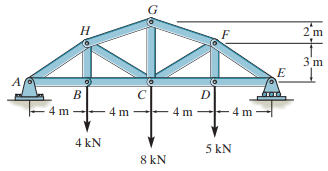

In [191]:
from IPython.display import Image
Image("pictures/problem_6_46.png")

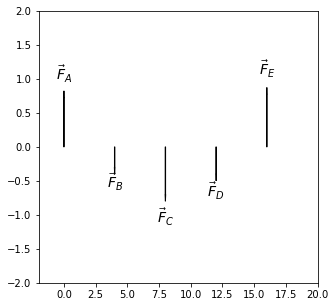

In [192]:
import numpy as np
from matplotlib.patches import FancyArrow, Rectangle, Circle
import matplotlib.pyplot as plt
beam_length_bottom = 4
beam_length_middle = 3
beam_length_top = 2
# angle HAB
theta = np.arctan(beam_length_middle/beam_length_bottom)
#angle GHF
alpha = np.arctan(beam_length_top / beam_length_bottom)
# angle CBC
beta = np.arctan(0 / beam_length_bottom)
#angle GCB
gamma = np.pi/2
positions = {
    'A': np.array([0,0]),
    'B': np.array([beam_length_bottom,0]),
    'C': np.array([2 * beam_length_bottom, 0]),
    'D': np.array([3 * beam_length_bottom, 0]),
    'E': np.array([4 * beam_length_bottom, 0]),
    'F': np.array([3 * beam_length_bottom, beam_length_middle]),
    'G': np.array([2 * beam_length_bottom, beam_length_middle + beam_length_top]),
    'H': np.array([beam_length_bottom,beam_length_middle]),
    'O': np.array([-2,0])
}
figure, axes = plt.subplots(figsize=(5,5))
axes.set_xlim([-2 , 20])
axes.set_ylim([-2 ,2])

vectors = {
    'F_{A}': {'origin': positions['A'], 'vector': np.array([0,.825])},
    'F_{B}': {'origin': positions['B'], 'vector': np.array([0,-.4])},
    'F_{C}': {'origin': positions['C'], 'vector': np.array([0,-.8])},
    'F_{D}': {'origin': positions['D'], 'vector': np.array([0,-.5])},
    'F_{E}': {'origin': positions['E'], 'vector': np.array([0,.875])},
}
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.03,length_includes_head=True, color='k',head_width=.05,head_length=.1)
    axes.text(origin[0] + vector[0],
               origin[1] + vector[1] * 1.3,
               r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
               va='center',ha='center'
                               )
    axes.add_patch(vector_arrow)

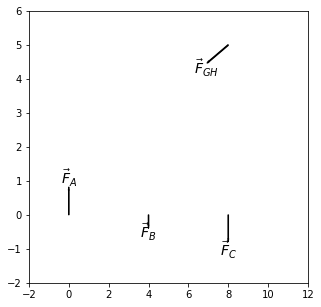

In [193]:
figure, axes = plt.subplots(figsize=(5,5))
axes.set_xlim([-2 , 12])
axes.set_ylim([-2 ,6])
vectors = {
    'F_{A}': {'origin': positions['A'], 'vector': np.array([0,.825])},
    'F_{B}': {'origin': positions['B'], 'vector': np.array([0,-.4])},
    'F_{C}': {'origin': positions['C'], 'vector': np.array([0,-.8])},
    'F_{GH}': {'origin': positions['G'], 'vector': -1.2 * np.array([np.cos(alpha),np.sin(alpha)])}
}
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.03,length_includes_head=True, color='k',head_width=.05,head_length=.1)
    axes.text(origin[0] + vector[0],
               origin[1] + vector[1] * 1.3,
               r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
               va='center',ha='center'
                               )
    axes.add_patch(vector_arrow)

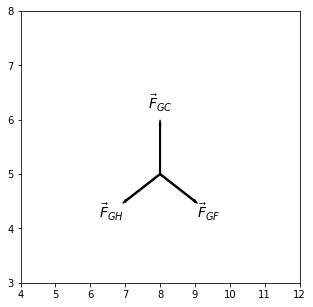

In [194]:
figure, axes = plt.subplots(figsize=(5,5))
axes.set_xlim([4 , 12])
axes.set_ylim([3 ,8])
vectors = {
    'F_{GC}': {'origin': positions['G'], 'vector': np.array([np.cos(gamma),np.sin(gamma)])},
    'F_{GF}': {'origin': positions['G'], 'vector': 1.2 * np.array([np.cos(alpha),-np.sin(alpha)])},
    'F_{GH}': {'origin': positions['G'], 'vector': -1.2 * np.array([np.cos(alpha),np.sin(alpha)])}
}
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.03,length_includes_head=True, color='k',head_width=.05,head_length=.1)
    axes.text(origin[0] + vector[0] * 1.3,
               origin[1] + vector[1] * 1.3,
               r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
               va='center',ha='center'
                               )
    axes.add_patch(vector_arrow)

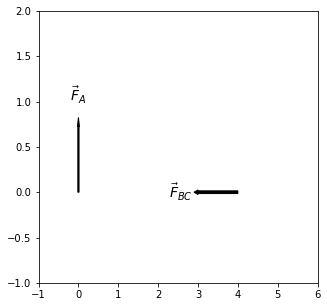

In [195]:
figure, axes = plt.subplots(figsize=(5,5))
axes.set_xlim([-1 , 6])
axes.set_ylim([-1 ,2])
vectors = {
    'F_{A}': {'origin': positions['A'], 'vector':np.array([0,.825])} ,
    'F_{BC}': {'origin': positions['B'], 'vector': -1.1 * np.array([1,0])},
}
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.03,length_includes_head=True, color='k',head_width=.05,head_length=.1)
    axes.text(origin[0] + vector[0] * 1.3,
               origin[1] + vector[1] * 1.3,
               r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
               va='center',ha='center'
                               )
    axes.add_patch(vector_arrow)

In [196]:
import numpy as np
beam_length_bottom = 4
beam_length_middle = 3
beam_length_top = 2
positions = {
    'A': np.array([0,0]),
    'B': np.array([beam_length_bottom,0]),
    'C': np.array([2 * beam_length_bottom, 0]),
    'D': np.array([3 * beam_length_bottom, 0]),
    'E': np.array([4 * beam_length_bottom, 0]),
    'F': np.array([3 * beam_length_bottom, beam_length_middle]),
    'G': np.array([2 * beam_length_bottom, beam_length_middle + beam_length_top]),
    'H': np.array([beam_length_bottom,beam_length_middle]),
    'O': np.array([-2,0])
}
magnitudes = {
}
for force in ['F_1','F_2','F_3','F_GH','F_BC','F_CH','F_GF','F_CG']:
    magnitudes[force] = {}
magnitudes['F_1']= 4
magnitudes['F_2'] = 8
magnitudes['F_3'] = 5
# angle HAB
theta = np.arctan(beam_length_middle/beam_length_bottom)
#angle GHF
alpha = np.arctan(beam_length_top / beam_length_bottom)
# angle CBC
beta = np.arctan(0 / beam_length_bottom)
#angle GCB
gamma = np.pi/2
#moment about E
magnitudes['F_Y_left'] = ((((positions['E'] - positions['D']) * magnitudes['F_3'] +(positions['E'] - positions['C']) * magnitudes['F_2'] + (positions['E'] - positions['B']) * magnitudes['F_1']) /  positions['E'])[0])
print(magnitudes['F_Y_left'])
#moment about C (section ACG)
magnitudes['F_GH'] = (magnitudes['F_Y_left'] * (positions['C'] - positions['A'])[0] - magnitudes['F_1'] * (positions['C'] - positions['B']))[0] / (np.sin(alpha) * (positions['C'] - positions['O'])[0])
#moment about H
magnitudes['F_BC'] = magnitudes['F_Y_left'] * (positions['H']-positions['A'])[0] / (positions['H'] - positions['B'])[1]
#moment about O
magnitudes['F_CH'] = (magnitudes['F_Y_left'] * positions['O'][0] + magnitudes['F_1'] * (positions['B'][0] - positions['O'][0])) / (np.sin(theta) * (positions['C'][0] - positions['O'][0]))
#sum of F_x at G
magnitudes['F_GF'] = magnitudes['F_GH'] * np.cos(alpha) / np.cos(alpha)
#sum of F_y at G
magnitudes['F_CG'] = magnitudes['F_GF'] * np.sin(alpha) + magnitudes['F_GH'] * np.sin(alpha)

vectors = {
}
for force in ['F_GH','F_BC','F_CH','F_GF','F_CG']:
    vectors[force] = {}
vectors['F_GH'] = magnitudes['F_GH'] * np.array([np.cos(alpha),np.sin(alpha)])
vectors['F_BC'] = magnitudes['F_BC'] * np.array([np.cos(beta),np.sin(beta)])
vectors['F_CH'] = magnitudes['F_CH'] * np.array([np.cos(theta),np.sin(theta)])
vectors['F_GF'] = magnitudes['F_GF'] * -np.array([np.cos(alpha),np.sin(alpha)])
vectors['F_CG'] = magnitudes['F_CG'] * np.array([np.cos(gamma),np.sin(gamma)])
print(vectors['F_GH'])
for vector in vectors:
    difference = positions[vector[3]] - positions[vector[2]]
    t_c = np.dot(difference,vectors[vector]) / (np.linalg.norm(difference) * magnitudes[vector])
    magnitude = magnitudes[vector]
    # print(difference)
    # print(vectors[vector])
    if 0<t_c<=1:
        print(f' {vector} = {magnitude:.2f}kN T')
    elif -1<=t_c<0:
        print(f' {vector} = {magnitude:.2f}kN C')



8.25
[10.  5.]
 F_GH = 11.18kN C
 F_BC = 11.00kN T
 F_CH = 1.25kN C
 F_GF = 11.18kN C
 F_CG = 10.00kN T


C:\Users\Michael\AppData\Local\Temp/ipykernel_27896/3102101803.py:32: RuntimeWarning: invalid value encountered in true_divide
  magnitudes['F_Y_left'] = ((((positions['E'] - positions['D']) * magnitudes['F_3'] +(positions['E'] - positions['C']) * magnitudes['F_2'] + (positions['E'] - positions['B']) * magnitudes['F_1']) /  positions['E'])[0])


## Section 6.5
* Space Truss - truss that consists of members joined together ast their ends to form a stable 3D structure
* Tetrahedron - simplest space truss, created by connecting six members together
* Simple Space Truss - built from a tetrahedron, and adding three more members and a joint, and continuing this to form a system of multi connected tetrahedrons
* Members of a space truss can be treated as two-force members, if the external loading is applied at the joints and the joints are ball-and-socket connections
* This assumption is valid if the weight of the members is negligible and the welded or bolted connections of the joined members intersect a common point
* If weight is included then we can apply it as a vertical force with half the magnitude applied at each end of the member

Problem 54
The space truss supports a force
F = {600i + 450j - 750k} lb. Determine the force in each
member, and state if the members are in tension or
compression.

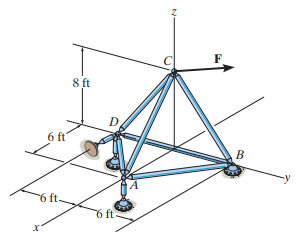

In [197]:
from IPython.display import Image
Image("pictures/problem_6_54.png")

In [198]:
import numpy as np
alpha = np.radians(45)
positions = {
    'A': np.array([6,0,0]),
    'B': np.array([0,6,0]),
    'C': np.array([0,0,8]),
    'D': np.array([0,-6,0]),
}
vectors_by_joint = {
    'C': {'C': np.array([600,450,-750])},
}
magnitudes = {
}
for force in ['A','CA','CB','CD','AB','AD','DB']:
    magnitudes[force] = {}


# joint C
magnitudes['CA'] = -vectors_by_joint['C']['C'][0] * 5/3
# magnitudes['CD'] = (vectors_by_joint['C']['C'][1] + magnitudes['CB'] * 3/5) * 5/3
# magnitudes['CB'] = (-magnitudes['CD'] * 4/5 - (magnitudes['CA'] * 4/5) - magnitudes['C'][2])
coefficients = np.array([
    [1,-1],
    [-1,-1]
])
right_hand_side = np.array([(-vectors_by_joint['C']['C'][1] * 5/3),(-5/4 * vectors_by_joint['C']['C'][2] + magnitudes['CA'])])
solution = np.linalg.solve(coefficients,right_hand_side)
magnitudes['CB'] = solution[0]
magnitudes['CD'] = solution[1]

# joint A
magnitudes['A'] = (-magnitudes['CA'] * 3 / 5) /(2 * np.sin(alpha))
# 0 = magnitudes['AB'] * np.cos(alpha) - magnitudes['AD'] * np.cos(alpha)
magnitudes['AB'] = magnitudes['A']
magnitudes['AD'] = magnitudes['A']

#joint D
magnitudes['BD'] = magnitudes['CD'] * 3/5 + magnitudes['AD'] * np.cos(alpha)

vectors_by_joint['CA'] = magnitudes['CA'] * np.array([3/5,0,-4/5])
vectors_by_joint['CB'] = magnitudes['CB'] * np.array([0,3/5,-4/5])
vectors_by_joint['CD'] = magnitudes['CD'] * np.array([0,-3/5,-4/5])
vectors_by_joint['AB'] = magnitudes['AB'] * np.array([-np.cos(alpha),np.sin(alpha),0])
vectors_by_joint['AD'] = magnitudes['AD'] * np.array([-np.cos(alpha),-np.sin(alpha),0])
vectors_by_joint['BD'] = magnitudes['BD'] * np.array([0,1,0])
print(magnitudes)
print(vectors_by_joint)

for vector in vectors_by_joint:
    if len(vector)>1:
        # print(vector)
        # print(vectors_by_joint[vector])
        difference = positions[vector[1]] - positions[vector[0]]
        t_c = np.dot(difference, vectors_by_joint[vector]) / (np.linalg.norm(difference) * np.linalg.norm(vectors_by_joint[vector]))
        magnitude = magnitudes[vector]
        if 0<t_c<=1.1:
            print(f' {vector} = {abs(magnitude):.2f}kN T')
        elif -1.1<=t_c<0:
            print(f' {vector} = {abs(magnitude):.2f}kN C')



{'A': 424.2640687119285, 'CA': -1000.0, 'CB': -343.75, 'CD': 406.25, 'AB': 424.2640687119285, 'AD': 424.2640687119285, 'DB': {}, 'BD': 543.75}
{'C': {'C': array([ 600,  450, -750])}, 'CA': array([-600.,   -0.,  800.]), 'CB': array([  -0.  , -206.25,  275.  ]), 'CD': array([   0.  , -243.75, -325.  ]), 'AB': array([-300.,  300.,    0.]), 'AD': array([-300., -300.,    0.]), 'BD': array([  0.  , 543.75,   0.  ])}
 CA = 1000.00kN C
 CB = 343.75kN C
 CD = 406.25kN T
 AB = 424.26kN T
 AD = 424.26kN T
 BD = 543.75kN C


## Section 6.6
* Multiforce members - members that are subjected to more than two forces
* Frame - used to support loads
* Machine - contains moving parts that are designed to transmit and alter the effect of forces
* Can determine the forces acting at the joints of frames or machines with equations of equilibrium to each of the members if the frame or machine contains no addition members than what's needed to prevent it from collapse
* With these forces we can design the size of the members, connections, and supports
* FBD
    * Isolate each part by drawing its outlined shape, show all forces and couple moments acting on that part, label forces, and coordinate system, indicate dimensions used for taking moments
    * Identify two-force members and draw the FBD with 2 equal but opposite collinear forces acting at the joint
    * Forces common to any two contacting members act with equal magnitudes but opposite sense on their members. If the two members are a system of connected members then the forces are internal and not included in FBD of the system, if a FBD is drawn for each member is drawn then the forces are external and are included in the FBD, and will be shown as equal but opposite forces

Problem 95
The nail cutter consists of the handle and the two
cutting blades. Assuming the blades are pin connected at B
and the surface at D is smooth, determine the normal force
on the fingernail when a force of 1 lb is applied to the
handles as shown. The pin AC slides through a smooth hole
at A and is attached to the bottom member at C.

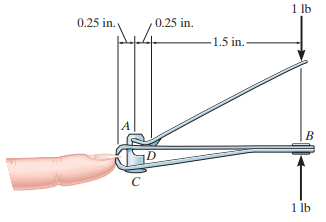

In [199]:
from IPython.display import Image
Image("pictures/problem_6_95.png")

In [200]:
import numpy as np
#moment at D
F_1 = 1
F_A = F_1 * 1.5 / .25
#sum of y
N_D = F_1 + F_A
#moment at B
F_N = N_D * 1.5 / 2
print(f'F_N_t = {F_N} lb')


F_N_t = 5.25 lb
